In [ ]:
# 1. import library
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# 2. Load data
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<h3>3. Tiến hành phân tích dữ liệu EDA các cột dữ liệu input<h3/>

In [ ]:
# 3.1 Hiển thị cách đánh index của dữ liệu
df.index

RangeIndex(start=0, stop=303, step=1)

In [ ]:
# 3.2 Danh sách các cột input mà chúng ta muốn eda
columns_eda = df.columns[:-1]
columns_eda

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

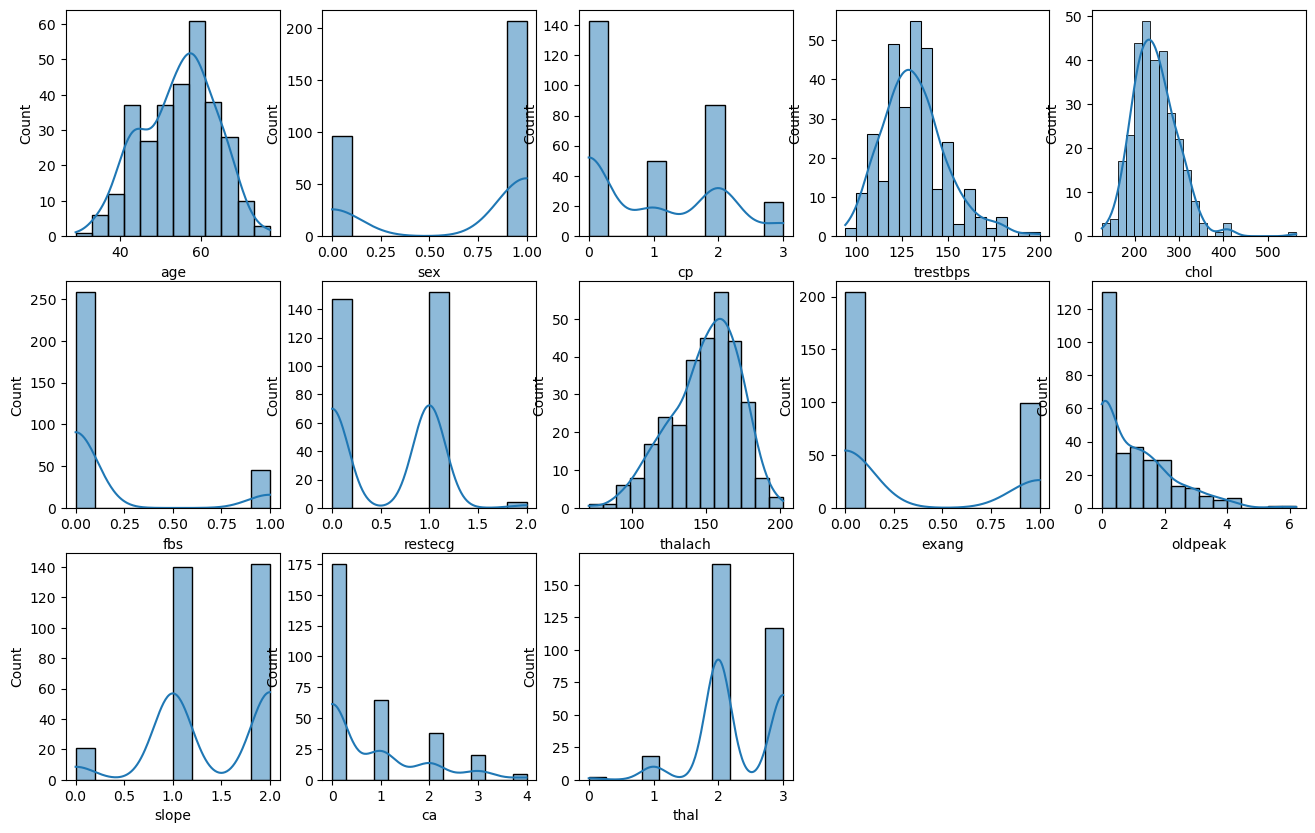

In [ ]:
# 3.3 Phân tích phân phối các biến số input
fig = plt.figure(figsize=(16,10))

for i in range(len(columns_eda)):
    colname = columns_eda[i]
    sub = fig.add_subplot(3, 5, i+1)
    sns.histplot(data=df, x=colname, kde=True)


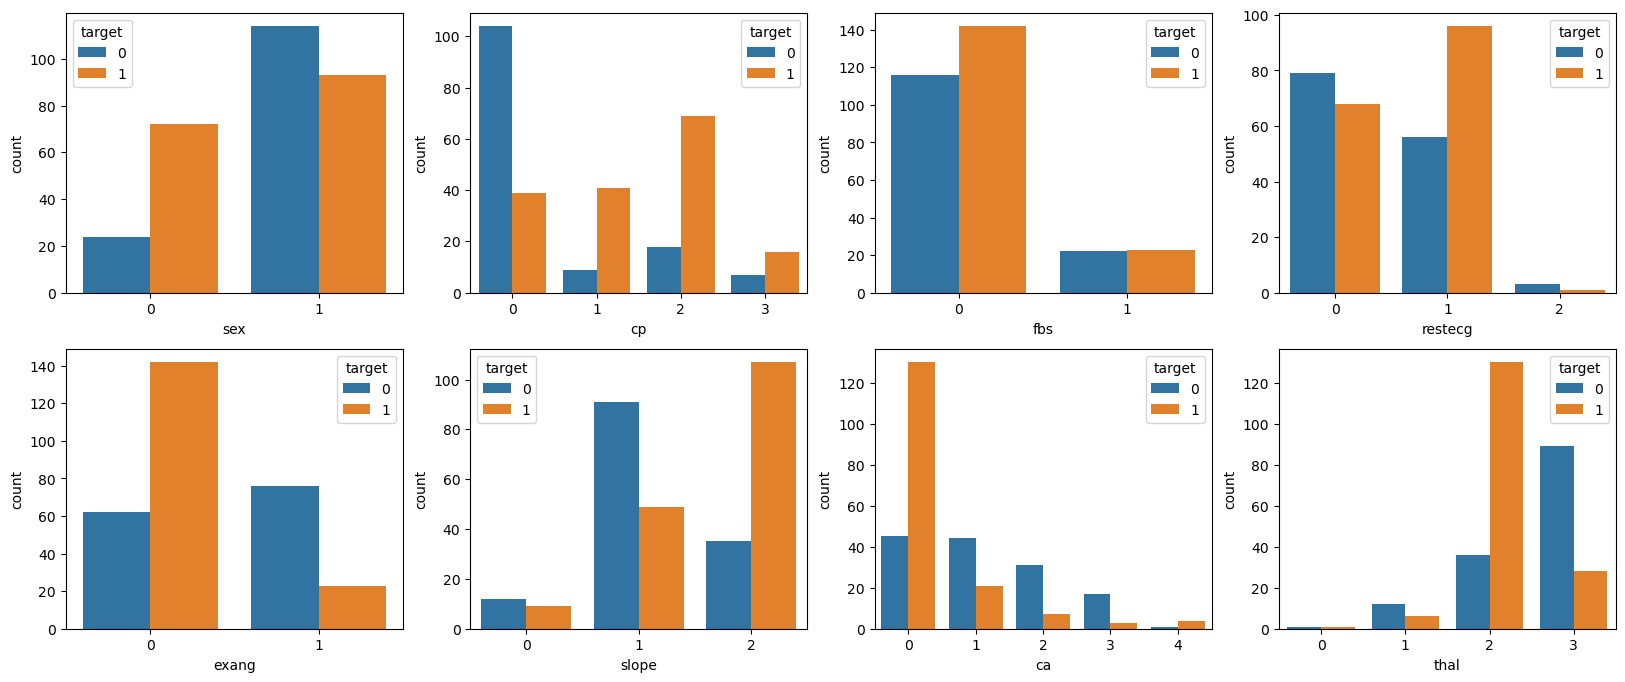

In [ ]:
#3.4 Đếm xem số lượng các biến input (nhóm định tính) theo biến mục tiêu
categories_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig = plt.figure(figsize=(20,8))

for i in range(len(categories_list)):
    colname = categories_list[i]
    sub = fig.add_subplot(2, 4, i+1)
    sns.countplot(data=df, x=colname, hue='target')

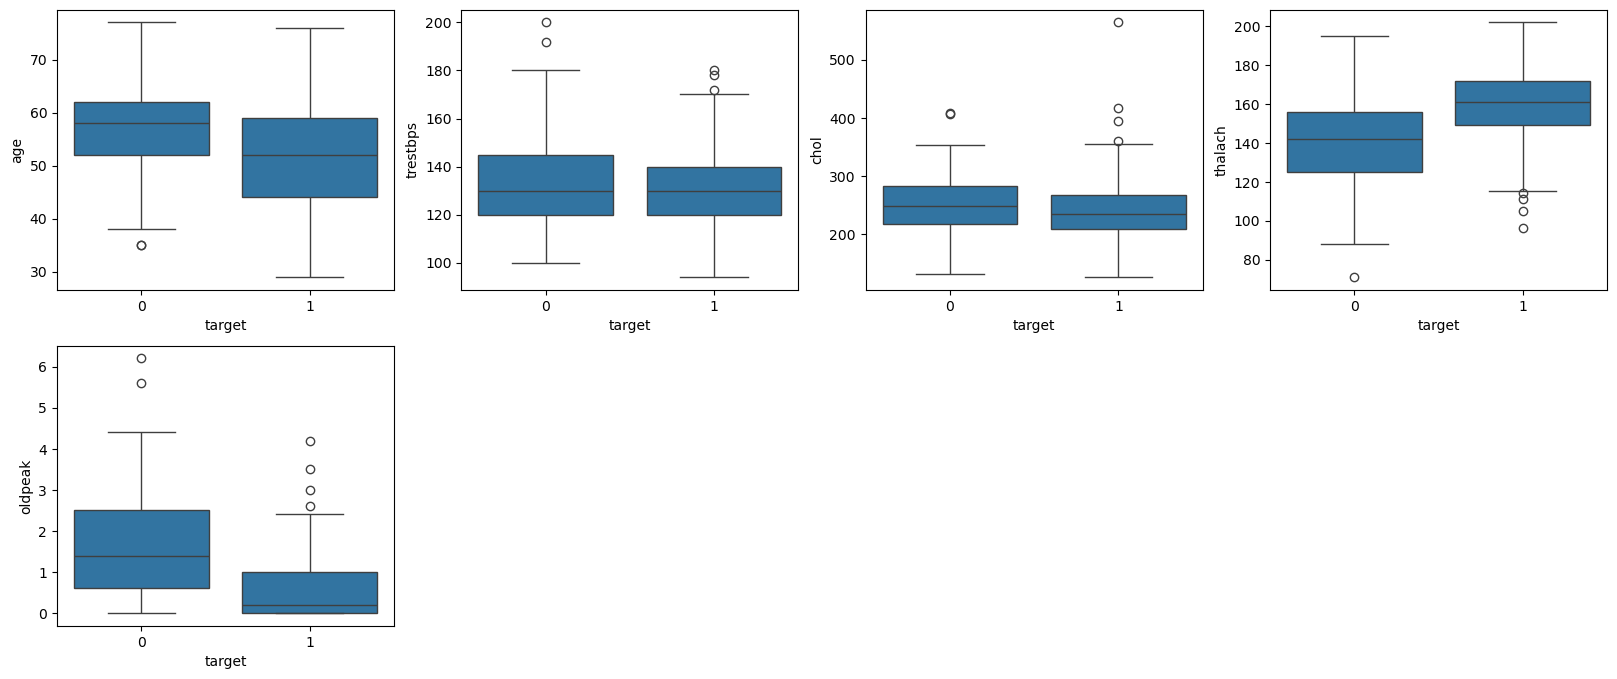

In [ ]:
#3.5 Phân tích biểu đồ Box-plot các biến input (nhóm định lượng) theo biến mục tiêu
numeric_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig = plt.figure(figsize=(20,8))

for i in range(len(numeric_list)):
    colname = numeric_list[i]
    sub = fig.add_subplot(2, 4, i+1)
    sns.boxplot(data=df, y=colname , x='target')

<h3>4. Xây dựng mô hình<h3/>

In [ ]:
# 4.1 Chuẩn bị dữ liệu
X = df.iloc[:, :-1].values
y = df[['target']].values
X = X.astype(float)
y = y.astype(float)

In [ ]:
# 4.2 Phân chia tập dữ liệu thành hai phần train và test tỉ lệ 80:20 và hệ số random là 42
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, indices_train, indinces_test = train_test_split(X, y, df.index, test_size=0.2, random_state=42)

In [ ]:
# 4.3 Hiển thị danh sách 5 dòng cuối cùng trong tập X_test và y_test
print(X_test[0:5])
print(y_test[0:5])

[[5.70e+01 1.00e+00 0.00e+00 1.50e+02 2.76e+02 0.00e+00 0.00e+00 1.12e+02
  1.00e+00 6.00e-01 1.00e+00 1.00e+00 1.00e+00]
 [5.90e+01 1.00e+00 3.00e+00 1.70e+02 2.88e+02 0.00e+00 0.00e+00 1.59e+02
  0.00e+00 2.00e-01 1.00e+00 0.00e+00 3.00e+00]
 [5.70e+01 1.00e+00 2.00e+00 1.50e+02 1.26e+02 1.00e+00 1.00e+00 1.73e+02
  0.00e+00 2.00e-01 2.00e+00 1.00e+00 3.00e+00]
 [5.60e+01 0.00e+00 0.00e+00 1.34e+02 4.09e+02 0.00e+00 0.00e+00 1.50e+02
  1.00e+00 1.90e+00 1.00e+00 2.00e+00 3.00e+00]
 [7.10e+01 0.00e+00 2.00e+00 1.10e+02 2.65e+02 1.00e+00 0.00e+00 1.30e+02
  0.00e+00 0.00e+00 2.00e+00 1.00e+00 2.00e+00]]
[[0.]
 [0.]
 [1.]
 [0.]
 [1.]]


In [ ]:
# 4.4 Hiển thị danh sách index của các sample trong tập X_train, y_train
print(indices_train)
print(indinces_test)

Index([132, 202, 196,  75, 176,  59,  93,   6, 177,  30,
       ...
        87, 214, 121, 302,  20, 188,  71, 106, 270, 102],
      dtype='int64', length=242)
Index([179, 228, 111, 246,  60,   9, 119, 223, 268,  33,   5, 101,  45, 175,
       118,  46, 125, 192, 285, 279, 152, 269, 272,  25, 146, 283, 254,  73,
       231, 109, 139, 284, 198,  42,  17, 168,  76,  90,  24,  57,  92,  77,
       137, 116,   7, 251, 281,  78, 292, 232, 219, 255,  63,  82, 236, 204,
       249, 104, 300, 193, 184],
      dtype='int64')


In [ ]:
# 4.5 Huấn luyện mô hình
knnModel = KNeighborsClassifier(n_neighbors=5, algorithm="brute", metric="minkowski")

knnModel.fit(X_train, y_train)

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='brute')

In [47]:
# 6. Đánh giá mô hình trên tập dữ liệu train và test bằng độ đo accuracy
print(knnModel.score(X_train, y_train))
print(knnModel.score(X_test, y_test))

0.7603305785123967
0.6885245901639344


<h3>5. Hperparameter tuning model with Grid Search<h3/>

<h5>- Sử dụng độ đo đánh giá accurary trên tập train và test để so sánh<h5/>
<h5>- Trả lời câu hỏi lựa chọn lựa K bao nhiêu là tốt nhất cho mô hình K-NN<h5/>


In [ ]:
# n_neighbors : Number of neighbors to use, default is 5
# algorithm: lgorithm used to compute the nearest neighbors, default is "auto", list of algorithm: "ball_tree", "kd_tree", "brute", "auto"
# metric: Metric to use for distance computation, default is "minkowski", list of algorithm: "euclidean", "manhattan", "minskowski"

Number of candidates: 20
0/19:  {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 2} 0.8099173553719008 0.639344262295082
1/19:  {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 3} 0.7727272727272727 0.6557377049180327
2/19:  {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 4} 0.743801652892562 0.6721311475409836
3/19:  {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 5} 0.7603305785123967 0.6885245901639344


c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

4/19:  {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 6} 0.7520661157024794 0.7213114754098361
5/19:  {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 2} 0.8099173553719008 0.639344262295082
6/19:  {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 3} 0.7727272727272727 0.6557377049180327
7/19:  {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 4} 0.743801652892562 0.6721311475409836
8/19:  {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 5} 0.7603305785123967 0.6885245901639344


c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

9/19:  {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 6} 0.7520661157024794 0.7213114754098361
10/19:  {'algorithm': 'kd_tree', 'metric': 'euclidean', 'n_neighbors': 2} 0.8099173553719008 0.639344262295082
11/19:  {'algorithm': 'kd_tree', 'metric': 'euclidean', 'n_neighbors': 3} 0.7727272727272727 0.6557377049180327
12/19:  {'algorithm': 'kd_tree', 'metric': 'euclidean', 'n_neighbors': 4} 0.743801652892562 0.6721311475409836
13/19:  {'algorithm': 'kd_tree', 'metric': 'euclidean', 'n_neighbors': 5} 0.7603305785123967 0.6885245901639344
14/19:  {'algorithm': 'kd_tree', 'metric': 'euclidean', 'n_neighbors': 6} 0.7520661157024794 0.7213114754098361
15/19:  {'algorithm': 'kd_tree', 'metric': 'minkowski', 'n_neighbors': 2} 0.8099173553719008 0.639344262295082


c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

16/19:  {'algorithm': 'kd_tree', 'metric': 'minkowski', 'n_neighbors': 3} 0.7727272727272727 0.6557377049180327
17/19:  {'algorithm': 'kd_tree', 'metric': 'minkowski', 'n_neighbors': 4} 0.743801652892562 0.6721311475409836
18/19:  {'algorithm': 'kd_tree', 'metric': 'minkowski', 'n_neighbors': 5} 0.7603305785123967 0.6885245901639344
19/19:  {'algorithm': 'kd_tree', 'metric': 'minkowski', 'n_neighbors': 6} 0.7520661157024794 0.7213114754098361
[[{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 2}, 0.8099173553719008, 0.639344262295082], [{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 3}, 0.7727272727272727, 0.6557377049180327], [{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 4}, 0.743801652892562, 0.6721311475409836], [{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 5}, 0.7603305785123967, 0.6885245901639344], [{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 6}, 0.7520661157024794, 0.7213114754098361],

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


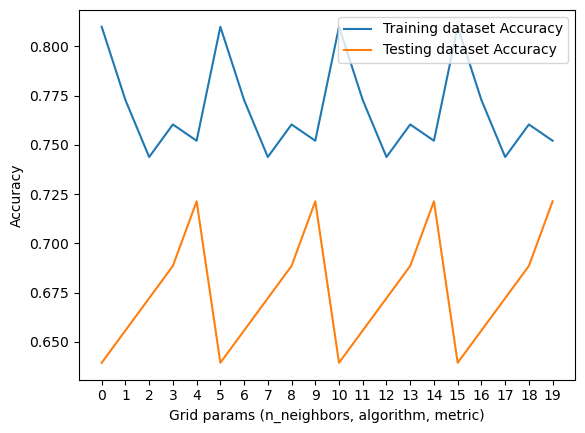

In [ ]:
#5.1 Sử dụng grid-search với nhiều hyper-parameter
from sklearn.model_selection import ParameterGrid 
estimator = KNeighborsClassifier() 
param_grid = {'n_neighbors': range (2,7), 'algorithm': ["ball_tree", "kd_tree"], 
'metric': ["euclidean", "minkowski"]} 
param_candidates = ParameterGrid(param_grid) 
print(f'Number of candidates: {len(param_candidates)}')

results = [] 
for i, params in enumerate(param_candidates): 
    model = estimator.set_params(**params) 
    model.fit(X_train, y_train) 
    score_train = model.score(X_train, y_train) 
    score_test = model.score (X_test, y_test) 
    results.append([params, score_train, score_test]) 
    print(f'{i}/{len(param_candidates)-1}: ', params, score_train, score_test) 

print(results) 
print(f'Max score on train: {max(results, key = lambda x: x[1])}') 
print(f'Max score on test: {max(results, key=lambda x: x[2])}')

list_index_on_results = range (len(results)) 

list_score_on_train = [x[1] for x in results] 

print(list_score_on_train) 

list_score_on_test = [x[2] for x in results] 

print(list_score_on_test)

# Generate plot 
#plt.figure(figsize=(50,20)) 
plt.plot(list_index_on_results, list_score_on_train, label = 'Training dataset Accuracy' )
plt.plot(list_index_on_results, list_score_on_test, label = 'Testing dataset Accuracy') 
plt.legend() 
plt.xlabel('Grid params (n_neighbors, algorithm, metric)') 
plt.xticks(range (len(results)), range (len(results))) 
plt.ylabel('Accuracy') 
plt.show()

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

k=1, train score=1.0, test score=0.6229508196721312
k=2, train score=0.8099173553719008, test score=0.639344262295082
k=3, train score=0.7727272727272727, test score=0.6557377049180327
k=4, train score=0.743801652892562, test score=0.6721311475409836
k=5, train score=0.7603305785123967, test score=0.6885245901639344
k=6, train score=0.7520661157024794, test score=0.7213114754098361
k=7, train score=0.743801652892562, test score=0.7049180327868853


c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

k=8, train score=0.7231404958677686, test score=0.6885245901639344
k=9, train score=0.71900826446281, test score=0.6885245901639344
k=10, train score=0.6942148760330579, test score=0.7049180327868853
k=11, train score=0.7272727272727273, test score=0.7540983606557377
k=12, train score=0.6983471074380165, test score=0.7377049180327869


c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

k=13, train score=0.6900826446280992, test score=0.7377049180327869
k=14, train score=0.6942148760330579, test score=0.7377049180327869
k=15, train score=0.6859504132231405, test score=0.6885245901639344
k=16, train score=0.6735537190082644, test score=0.7213114754098361


c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

k=17, train score=0.6859504132231405, test score=0.6885245901639344
k=18, train score=0.6652892561983471, test score=0.6885245901639344
k=19, train score=0.6818181818181818, test score=0.7049180327868853
k=20, train score=0.6694214876033058, test score=0.6557377049180327
k=21, train score=0.6859504132231405, test score=0.7049180327868853
k=22, train score=0.6694214876033058, test score=0.7213114754098361
k=23, train score=0.7024793388429752, test score=0.7213114754098361


c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k=24, train score=0.6735537190082644, test score=0.7213114754098361


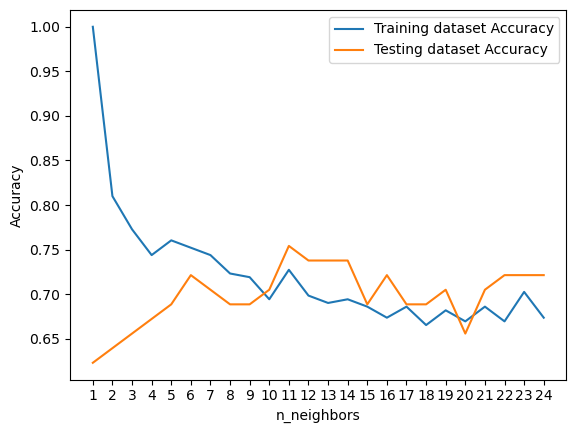

In [49]:
#5.2 Sử dụng tham số K để dò giá trị K tốt nhất

import numpy as np

neighbors = np.arange(1, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
    print(f'k={k}, train score={train_accuracy[i]}, test score={test_accuracy[i]}')

# Generate plot
plt.plot(neighbors, train_accuracy, label='Training dataset Accuracy')
plt.plot(neighbors, test_accuracy, label='Testing dataset Accuracy')
plt.xticks(np.arange(1, 25))
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


<h2>Sử dụng tham số K tốt nhất để giải quyết các yêu cầu bên dưới<h2/>

In [50]:
# 6. Xây dựng lại mô hình với K là tốt nhất
knnModel = KNeighborsClassifier(n_neighbors=11)
knnModel.fit(X_train, y_train)

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=11)

In [51]:
# 7. Hãy cho biết độ chính xác của mô hình
print(knnModel.score(X_train, y_train))
print(knnModel.score(X_test, y_test))


0.7272727272727273
0.7540983606557377


In [ ]:
# 8. In ra danh sách các index của mẫu dữ liệu trong tập test
# và khoảng cách từ các hàng xóm đến các mẫu dữ liệu đó theo mô hình
